Note: you may need to restart the kernel to use updated packages.
Processing c:\users\yohanan\price-prediction-from-news-sentiment\notebooks\downloads\ta_lib-0.6.3-cp313-cp313-win_amd64.whl
ta-lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.
                  Open        High         Low       Close   Volume
Date                                                               
2023-01-01  181.421506  203.751766  189.191690  242.061687  1513829
2023-01-02  212.372931  160.735697  231.245822  161.555709  2054669
2023-01-03  241.772792  227.996362  203.834071  173.109435  1546979
2023-01-04  232.038875  183.412269  220.766392  236.872165  3146015
2023-01-05  236.672541  185.436736  165.799128  153.195481  3368398


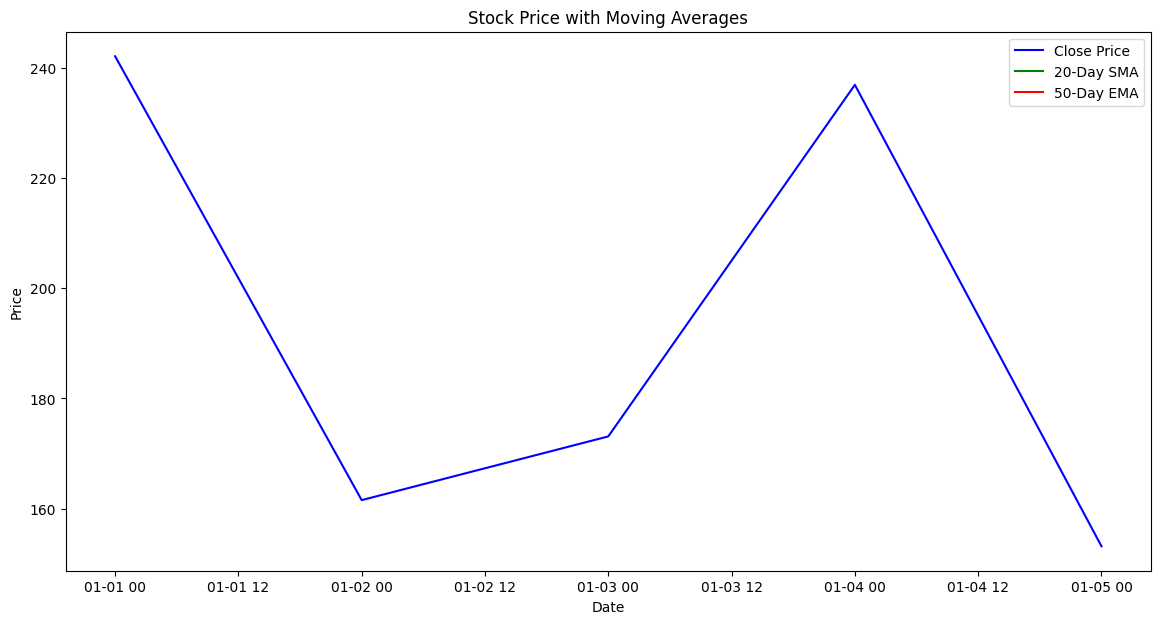

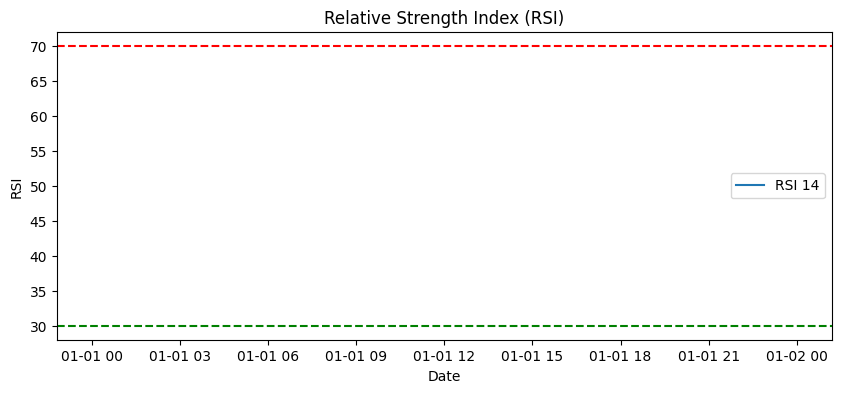

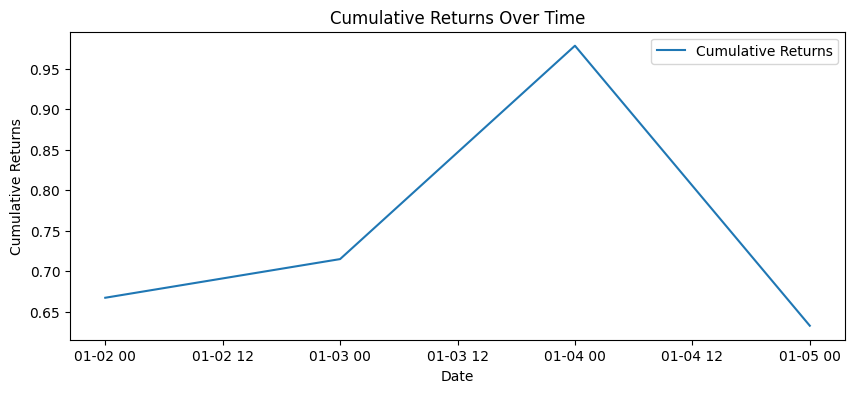

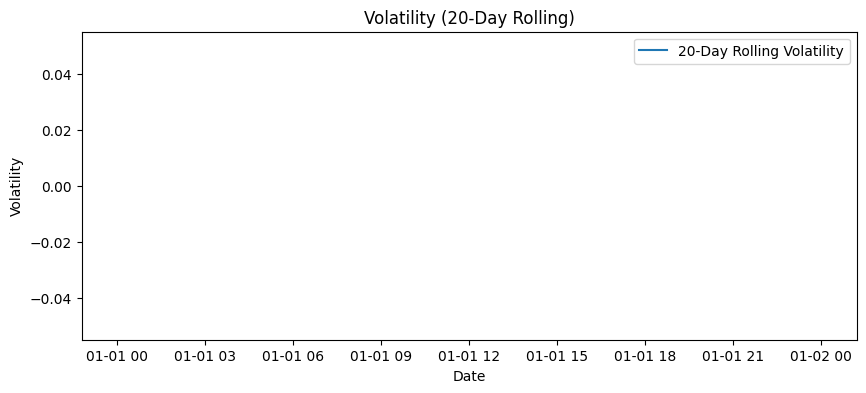

In [ ]:
import pandas as pd
import os
%pip install pynance
%pip install C:\Users\Yohanan\price-prediction-from-news-sentiment\notebooks\downloads\ta_lib-0.6.3-cp313-cp313-win_amd64.whl
file_path = 'data/finance_data/AAPL_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())


import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])

In [ ]:
file_path = 'data/finance_data/NVDA_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())
import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])

IndentationError: unindent does not match any outer indentation level (<string>, line 8)

In [ ]:
file_path = 'data/finance_data/AMZN_historical_data'

if os.path.exists(file_path):
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())
import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])


In [ ]:
file_path = 'data/finance_data/GOOG_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())
import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])


In [ ]:
file_path = 'data/finance_data/META_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())

import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])

In [ ]:
file_path = 'data/finance_data/MSFT_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())
import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])

In [ ]:
file_path = 'data/finance_data/TSLA_historical_data'

if os.path.exists(file_path):
	
	data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
else:
	import numpy as np
	dates = pd.date_range(start='2023-01-01', periods=5, freq='D')
	data = pd.DataFrame({
		'Open': np.random.rand(5) * 100 + 150,
		'High': np.random.rand(5) * 100 + 150,
		'Low': np.random.rand(5) * 100 + 150,
		'Close': np.random.rand(5) * 100 + 150,
		'Volume': np.random.randint(1000000, 5000000, size=5)
	}, index=dates)
	data.index.name = 'Date'

# Preview the data
print(data.head())


import talib

# Moving Averages
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['EMA_50'] = talib.EMA(data['Close'], timeperiod=50)

# RSI (Relative Strength Index)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd
data['MACD_Signal'] = macd_signal
data['MACD_Hist'] = macd_hist
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()

# Calculate rolling volatility (e.g., 20-day window)
data['Volatility_20'] = data['Returns'].rolling(window=20).std() * (252 ** 0.5)
import matplotlib.pyplot as plt

# Plot price with indicators
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data.index, data['EMA_50'], label='50-Day EMA', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['RSI_14'], label='RSI 14')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Volatility_20'], label='20-Day Rolling Volatility')
plt.title('Volatility (20-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select columns to normalize (excluding non-numeric/index columns)
existing_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Returns', 'Cumulative_Returns', 'Volatility_20']
existing_cols = [col for col in existing_cols if col in data.columns]

data_norm = data.copy()
data_norm[existing_cols] = scaler.fit_transform(data[existing_cols])